  ***
  ***
  
  #  Computational Astrophysics HW#4
  ## Mario L. Gutierrez Abed
  
  ***
  ***

##   <font color='green'> <em> <b>  Part a) </b> </em> </font> 

In [1]:
import numpy as np

'''
    Define \rho function for Part a)
'''

def rho_1(r):
    return np.exp(-r*r) / np.pi**1.5

In [2]:
import spectral_solver as spec

'''
   Do an N test, calculating the residual for some N values
'''
N_test = np.array((50, 75, 100, 150, 200))

residuals = np.zeros_like(N_test, dtype = np.float64)

for N in N_test:
    
    system = spec.SpectralSystem(rho = rho_1, N_max = N)
    c      = system.coeffs
    T      = system.spectral_matrix()
    source = system.source
    lhs    = np.zeros(N+1)
    
    for i in range(N+1):
        lhs[i] = np.dot(T[i], c)
  
    res = np.linalg.norm(lhs + source, ord=np.inf)    
    ind = np.where(N_test == N)[0][0]
    
    residuals[ind] = res

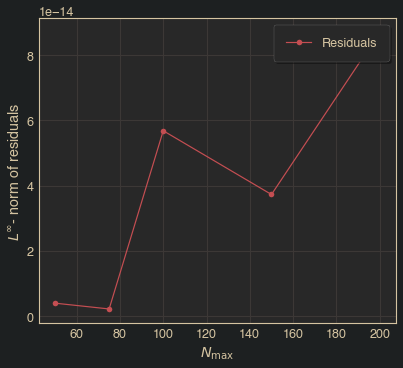

In [3]:
'''
    Plot residuals at the collocation points
'''    

from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
 
plt.plot(N_test, residuals, 'ro-', label="Residuals")
plt.xlabel(r'$N_{\mathrm{max}}$')
plt.ylabel(r'$L^\infty$- norm of residuals')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
# plt.savefig('./Figures/residuals_parta.pdf', bbox_inches='tight')
plt.show()

In [4]:
'''
    Evaluate the numerical solution on a new test grid (not the collocation points)
'''

residuals = np.zeros_like(N_test, dtype=np.float64)

for N in N_test:
    
    test_system = spec.SpectralSystem(rho = rho_1, N_max = N)
    psi_r       = test_system.y_r
    psi_rr      = test_system.y_rr
    r           = test_system.r_test
    r[0]        = r[0] + 1e-8   # avoid dividing by zero
    test_source = test_system.source_test
    
    res      = psi_rr + 2./r * psi_r + test_source
    res[0] = 0.
    res_linf = np.linalg.norm(res, ord=np.inf)    
    ind      = np.where(N_test == N)[0][0]
    residuals[ind] = res_linf

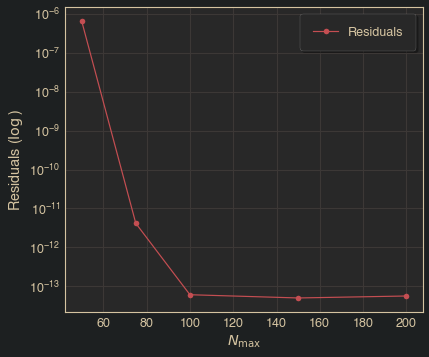

In [5]:
'''
    Plot residuals on this new test grid
'''   
plt.semilogy(N_test, residuals, 'ro-', label='Residuals')
plt.xlabel(r'$N_{\rm max}$')
plt.ylabel(r'Residuals ($\log$)')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
# plt.savefig('./Figures/residuals_testgrid_parta.pdf', bbox_inches='tight')
plt.show()

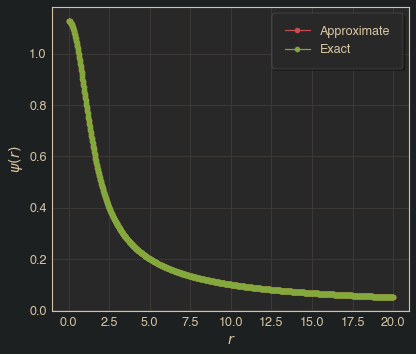

In [6]:
'''
    Compare numerical and solutions
'''

from scipy.special import erf
  
test_grid = test_system.r_test
sol = test_system.y

plt.plot(test_grid, sol, 'r-o', label="Approximate")
plt.plot(test_grid, erf(test_grid) / test_grid, 'g-o', label="Exact")
plt.xlabel(r'$r$')
plt.ylabel(r'$\psi(r)$')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
# plt.savefig('./Figures/num_exact_comp.pdf', bbox_inches='tight')
plt.show()

##   <font color='green'> <em> <b>  Part b) </b> </em> </font> 

In [7]:
'''
    Define \rho function for Parts b) and c)
'''

def rho_2(r):
    rho = np.where(0. <= r <= 1., np.exp(-r), 0.)
    return rho

In [9]:
'''
   Do an N test, calculating the L^2 amd L^\infty norms 
   of the residuals for some N values
'''

N_test_2       = np.array((500, 750, 1000, 1250))
residuals_linf = np.zeros_like(N_test_2,  dtype=np.float64)
residuals_l2   = np.zeros_like(N_test_2,  dtype=np.float64)

for N in N_test_2:
    
    system_2 = spec.SpectralSystem(rho = rho_2, N_max = N, M_max = 1500)
    psi_r       = system_2.y_r
    psi_rr      = system_2.y_rr
    r           = system_2.r_test
    r[0]        = r[0] + 1e-8     #avoid dividing by zero
    test_source = system_2.source_test
    
    res      = psi_rr + 2./r * psi_r + test_source
    res[0]   = 0.
    res_linf = np.linalg.norm(res, ord=np.inf) 
    res_l2   = np.linalg.norm(res)
    ind      = np.where(N_test_2 == N)[0][0]
    
    residuals_linf[ind] = res_linf
    residuals_l2[ind]   = res_l2

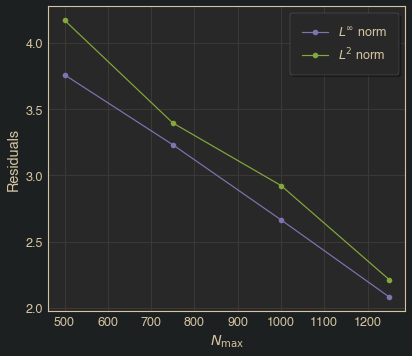

In [10]:
'''
    Plot L^2 and L^\infty norms of the residuals
'''   

plt.plot(N_test_2, residuals_linf, 'mo-', label=r'$L^{\infty}$ norm')
plt.plot(N_test_2, residuals_l2,  'go-', label=r'$L^2$ norm')
plt.xlabel(r'$N_{\rm max}$')
plt.ylabel('Residuals')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
# plt.savefig('./Figures/l_2_l_inf_partb.pdf', bbox_inches='tight')
plt.show()

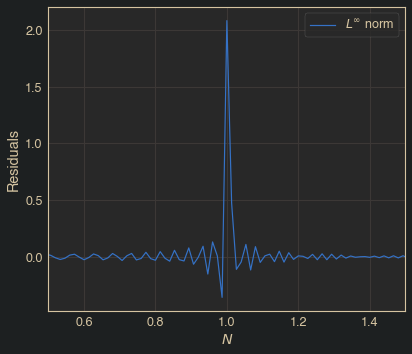

In [11]:
plt.plot(r, res, label=r'$L^{\infty}$ norm')
plt.xlabel(r'$N$')
plt.ylabel('Residuals')
plt.xlim(0.5, 1.5)
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
plt.legend()
plt.show()

##   <font color='green'> <em> <b>  Part c) </b> </em> </font> 

In [12]:
import spectral_two_grid as spec2
from IPython.display import display, Latex

system_2_improved = spec2.SpectralSystemTwoDomains(rho = rho_2, 
                       N_max = 499,
                       M_max = 500,
                       r_min = spec2.R_MIN_LEFT,
                       r_max = spec2.R_MAX_LEFT,
                       N_max_right = 499,
                       M_max_right = 100,
                       r_min_right = spec2.R_MIN_RIGHT,
                       r_max_right = spec2.R_MAX_RIGHT
                )

psi_r       = system_2_improved.y_r
psi_rr      = system_2_improved.y_rr
r           = system_2_improved.r
r[0]        = r[0] + 1e-8     #avoid dividing by zero
test_source = system_2_improved.source_test

res      = psi_rr + 2./r * psi_r + test_source
res[0]   = 0.
res[499] = 0.   #avoid the discontinuity
res_linf = np.linalg.norm(res, ord=np.inf) 
res_l2   = np.linalg.norm(res)

display(Latex(f'The $L^{{\infty}}$ norm is {res_linf}'))
display(Latex(f'The $L^2$ norm is {res_l2}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [30]:
'''
   Do an N test, calculating the L^2 amd L^\infty norms 
   of the residuals for some N values
'''

import spectral_two_grid as spec2

N_test_2       = np.array((100, 200, 300, 400, 500))
residuals_linf = np.zeros_like(N_test_2,  dtype=np.float64)
residuals_l2   = np.zeros_like(N_test_2,  dtype=np.float64)

for N in N_test_2:
    
    system_2_improved = spec2.SpectralSystemTwoDomains(rho = rho_2, 
                       N_max = N,
                       M_max = 500,
                       r_min = spec2.R_MIN_LEFT,
                       r_max = spec2.R_MAX_LEFT,
                       N_max_right = N,
                       M_max_right = 100,
                       r_min_right = spec2.R_MIN_RIGHT,
                       r_max_right = spec2.R_MAX_RIGHT
                )

    psi_r       = system_2_improved.y_r
    psi_rr      = system_2_improved.y_rr
    r           = system_2_improved.r
    r[0]        = r[0] + 1e-8     #avoid dividing by zero
    test_source = system_2_improved.source_test

    res      = psi_rr + 2./r * psi_r + test_source
    res[0]   = 0.
    
    #avoid the discontinuity
    discontinuity = np.where(np.abs(res) > 1.)[0][0] 
    res[discontinuity] = 0.
 
    res_linf = np.linalg.norm(res, ord=np.inf) 
    res_l2   = np.linalg.norm(res)
    ind      = np.where(N_test_2 == N)[0][0]
    
    residuals_linf[ind] = res_linf
    residuals_l2[ind]   = res_l2

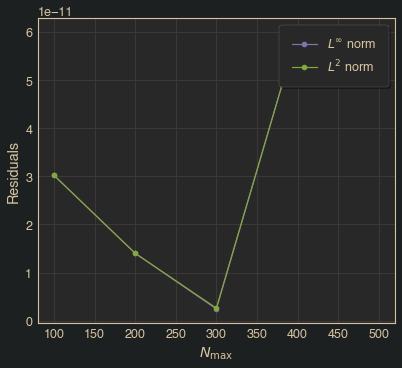

In [31]:
'''
    Plot L^2 and L^\infty norms of the residuals
'''   

plt.plot(N_test_2, residuals_linf, 'mo-', label=r'$L^{\infty}$ norm')
plt.plot(N_test_2, residuals_l2,  'go-', label=r'$L^2$ norm')
plt.xlabel(r'$N_{\rm max}$')
plt.ylabel('Residuals')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True,  loc='upper right')
plt.savefig('./Figures/l_2_l_inf_partc.pdf', bbox_inches='tight')
plt.show()